In [1]:
from random import randint
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble  # ,ClassicalRegister, QuantumRegister, 
from qiskit.visualization import plot_histogram

In [2]:
# Define number of players. No. of players = 2^n
n = 3

## Randomly select the id of Chor

In [12]:
chor_id = randint(0, 2**n - 1)  ## This is the secret string
chor_id = format(chor_id, '0'+str(n)+'b')
print(chor_id)

011


In [13]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# Put ancilla qubit in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates to spin the qubits into superposition
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the quantum gates
chor_id = chor_id[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if chor_id[q] == '0':
        bv_circuit.i(q)   # Identity gate
    else:
        bv_circuit.cx(q, n)   # CNOT gate
        
# Apply barrier 
bv_circuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

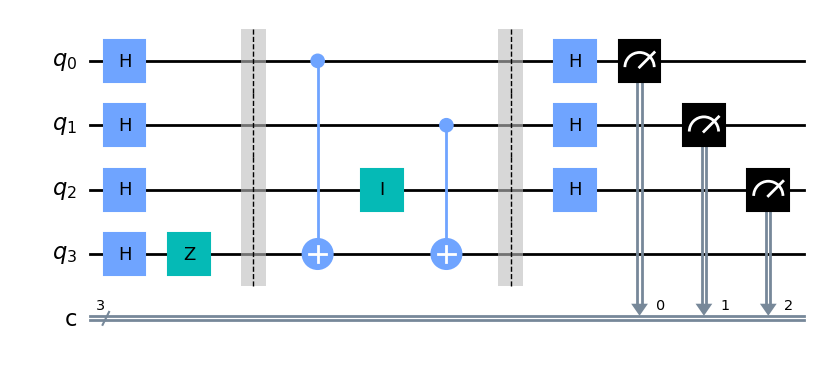

In [14]:
bv_circuit.draw('mpl')

In [15]:
# Use simulator to execute the quantum circuit
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

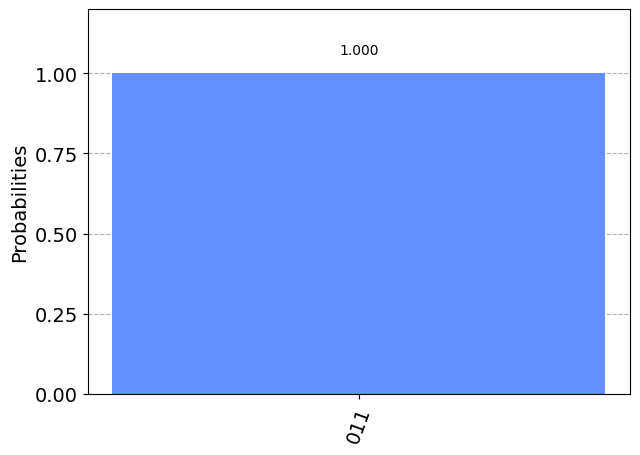

In [16]:
plot_histogram(answer)